In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
dset = pd.read_csv("../dataset/spam.csv",encoding = "latin-1")
dset.head(8)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN


In [3]:
dset.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)
dset.rename(columns = {'v1': 'Class', 'v2': 'Message'}, inplace = True)
dset.head()


,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
dset.loc[dset['Class']=="ham","Class"] = 0

In [5]:
dset.loc[dset['Class']=="spam","Class"] = 1

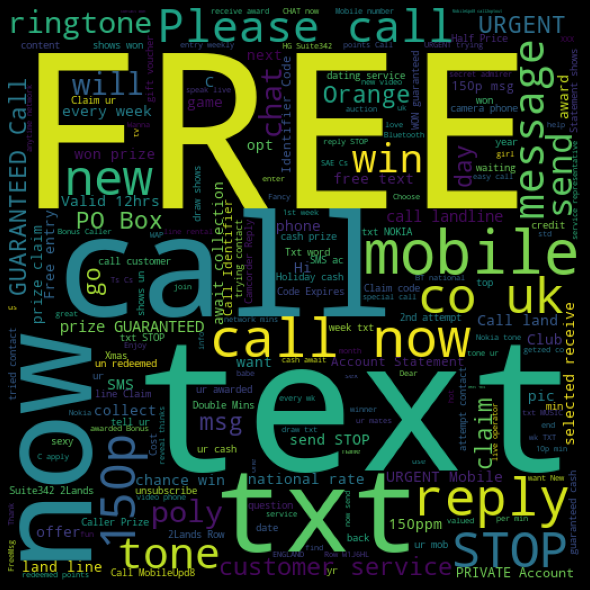

In [6]:
spam_words = ' '.join(list(dset[dset['Class'] == 1]['Message']))
spam_wc = WordCloud(width = 512,height = 512).generate(spam_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

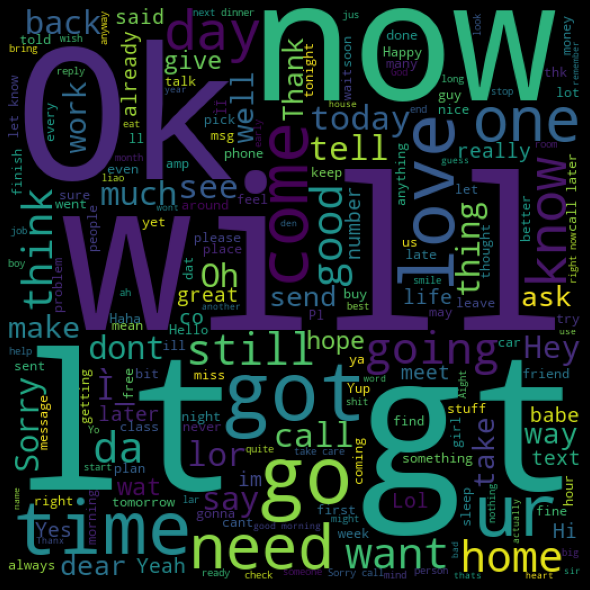

In [7]:
ham_words = ' '.join(list(dset[dset['Class'] == 0]['Message']))
ham_wc = WordCloud(width = 512,height = 512).generate(ham_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [8]:
#clean message from punctuations
def cleanMessage(message):
    nonPunc = [char for char in message if char not in string.punctuation]
    nonPunc = "".join(nonPunc)
    return nonPunc

In [9]:
dset['Message'] = dset['Message'].apply(cleanMessage)

In [10]:
dset.head(8)

,Class,Message
0,0,Go until jurong point crazy Available only in ...
1,0,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor U c already then say
4,0,Nah I dont think he goes to usf he lives aroun...
5,1,FreeMsg Hey there darling its been 3 weeks now...
6,0,Even my brother is not like to speak with me T...
7,0,As per your request Melle Melle Oru Minnaminun...


In [11]:
CV = CountVectorizer(stop_words="english")

In [12]:
x = dset['Message'].values
y = dset['Class'].values

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [14]:
xtrain_CV = CV.fit_transform(xtrain)

In [15]:
feat_names = CV.get_feature_names()

doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(xtrain_CV)]
df = pd.DataFrame(data=xtrain_CV.toarray(), index=doc_names,columns=feat_names)
df

,008704050406,0089my,01223585236,01223585334,0125698789,02,020603,0207,02070836089,02072069400,...,åòits,ìll,ìï,ìïll,ûªm,ûªt,ûªve,ûï,ûïharry,ûò
Doc0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Doc9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
NB = MultinomialNB()

In [17]:
ytrain = ytrain.astype(int)
ytest = ytest.astype(int)

NB.fit(xtrain_CV,ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
xtest_CV = CV.transform(xtest)
y_pred = NB.predict(xtest_CV)
accuracyScore = accuracy_score(ytest,y_pred)*100
print("Prediction Accuracy :",accuracyScore)

Prediction Accuracy : 98.38565022421525


In [21]:
msg = input("Enter Message: ")
msgInput = CV.transform([msg])
predict = NB.predict(msgInput)
if(predict[0]==1):
    print("SPAM")
else:
    print("HAM")

Enter Message: free entry for the exhibition
SPAM
